In [99]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Load dataset

In [100]:
X_flares = pd.read_csv('data/Xflares.csv')
y_flares = pd.read_csv('data/yflares.csv')
min_max_scaler = preprocessing.MinMaxScaler()
X_flares = pd.DataFrame(min_max_scaler.fit_transform(X_flares))

In [101]:
X_flares.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,0.281298,0.298243,0.172415,0.209697,0.143174,0.172191,0.257928,0.259372,0.316488,0.238783,0.396696,0.403930,0.517363,0.259888,0.363356,0.473130,0.554107,0.459102,0.386886
std,0.191976,0.206049,0.201959,0.154066,0.191353,0.180350,0.233568,0.233772,0.166962,0.215341,0.179540,0.200385,0.172572,0.135694,0.154147,0.198652,0.170225,0.182599,0.172958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.146810,0.157011,0.047067,0.097625,0.024686,0.059910,0.088983,0.089740,0.207731,0.069392,0.297685,0.265045,0.397275,0.172113,0.272740,0.316303,0.435115,0.324997,0.250138
50%,0.235157,0.241985,0.101231,0.183397,0.079469,0.120023,0.209325,0.207038,0.277550,0.182308,0.364707,0.369784,0.497972,0.242512,0.332142,0.487383,0.531512,0.460741,0.386580
75%,0.387686,0.390195,0.226428,0.296303,0.163415,0.213417,0.321276,0.318554,0.401667,0.302561,0.450480,0.526464,0.630406,0.311784,0.411589,0.616909,0.678883,0.590077,0.496256
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
y_flares.describe()

,intensity
count,275.000000
mean,-12.741032
std,1.033383
min,-14.865333
25%,-13.410045
50%,-12.940042
75%,-12.289454
max,-8.421883


# Data visualization

### Plot the histogram of intensity

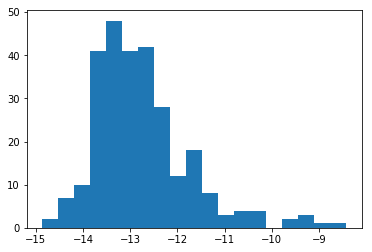

In [103]:
plt.hist(y_flares['intensity'], bins='auto') 
plt.show()

### Show covariates' correlations

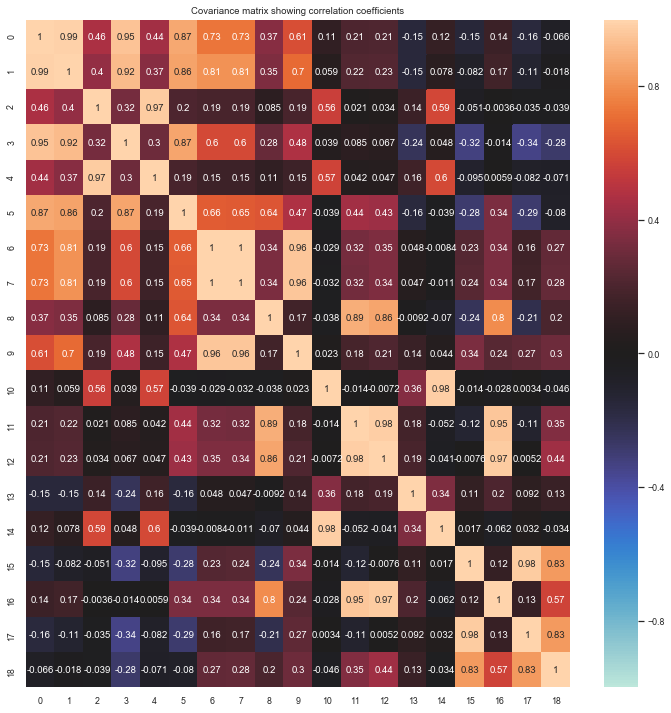

In [105]:
plt.figure(figsize=(10,10))
sn.set(font_scale=0.8)
sn.heatmap( X_flares.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

### Plot 2D PCA projection

Text(0,0.5,'component 2')

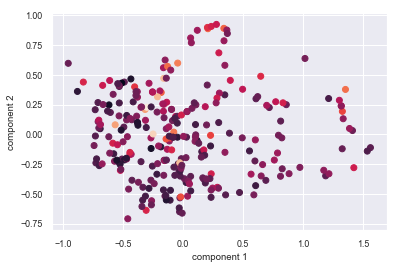

In [106]:
pca = PCA(n_components=3)
projected = pca.fit_transform(X_flares)

plt.scatter(projected[:, 0], projected[:, 1], c = y_flares['intensity'].to_list())
plt.xlabel('component 1')
plt.ylabel('component 2')

### Plot 3D PCA projection

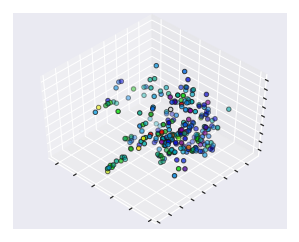

In [107]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2], c = y_flares['intensity'], cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# Basic Regression models

### Create train and test set

In [109]:
pca = PCA(n_components= 19)
X = pca.fit_transform(X_flares)

In [48]:
X_pca = pd.DataFrame({'pca1': X[:,0], 'pca2': X[:,1], 'pca3': X[:,2]})

In [49]:
X_pca.to_csv('Xflarespca3.csv', index = False)

In [110]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_flares, test_size=0.25, random_state=42)

In [51]:
X_train.shape

(206, 15)

## Linear Regression

In [111]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
y_lr_pred = lr.predict(X_test)
print("Linear Regression Root Mean Squared Error is: {}.".format(np.sqrt(mse(y_test, y_lr_pred))))

Linear Regression Root Mean Squared Error is: 1.0266056298.


## LASSO

In [113]:
lasso = linear_model.Lasso(alpha= 1)
lasso.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [114]:
y_la_pred = lasso.predict(X_test)
print("LASSO Root Mean Squared Error is: {}.".format(np.sqrt(mse(y_test, y_la_pred))))

LASSO Root Mean Squared Error is: 1.19317658168.


## Ridge Regression

In [115]:
ridge = linear_model.Ridge(alpha= 1)
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [116]:
y_rid_pred = ridge.predict(X_test)
print("Ridge Regression Root Mean Squared Error is: {}.".format(np.sqrt(mse(y_test, y_rid_pred))))

Ridge Regression Root Mean Squared Error is: 1.09366516125.


## Random Forest Regressor

In [117]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators = 1000, random_state=0)
regr.fit(X_train, y_train)

/Users/vietdo/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [118]:
y_rf_pred = regr.predict(X_test)
print("RF Regress Root Mean Squared Error is: {}.".format(np.sqrt(mse(y_test, y_rf_pred))))

RF Regress Root Mean Squared Error is: 1.07144676355.
